## Conduct an exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column. You’re expected to report about the following using  python script and slide  :
- Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.
- Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation. 
- Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpret your findings.
- Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings. 
- Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 
- Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data 
- Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum). 


### Import packages

In [36]:
import numpy as np
import pandas as pd
import math
import sys, os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# from IPython.display import Image
import plotly.io as pio
np.bool = np.bool_


# import numpy as np
# import pandas as pd
# import plotly.express as px
# import plotly.graph_objects as go


### Load the data

In [37]:
df = pd.read_csv("../../data/tellco_data.csv")
df

,Unnamed: 0,bearer_id,start,start_ms,end,end_ms,dur_ms,imsi,msisdn_number,imei,...,youtube_dl_bytes,youtube_ul_bytes,netflix_dl_bytes,netflix_ul_bytes,gaming_dl_bytes,gaming_ul_bytes,other_dl_bytes,other_ul_bytes,total_ul_bytes,total_dl_bytes
0,0,1.311448e+19,2019-04-04 12:01:00,770.0000,2019-04-25 14:35:00,662.00000,244908.750000,2.082014e+14,3.366496e+10,3.552121e+13,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,1,1.311448e+19,2019-04-09 13:04:00,235.0000,2019-04-25 08:15:00,606.00000,244908.750000,2.082019e+14,3.368185e+10,3.579401e+13,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,2,1.311448e+19,2019-04-09 17:42:00,1.0000,2019-04-25 11:58:00,652.00000,244908.750000,2.082008e+14,3.373458e+10,3.528151e+13,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,3,1.311448e+19,2019-04-10 00:31:00,486.0000,2019-04-25 07:36:00,171.00000,244908.750000,2.082014e+14,3.373458e+10,3.535661e+13,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,4,1.311448e+19,2019-04-12 20:10:00,565.0000,2019-04-25 10:40:00,954.00000,244908.750000,2.082014e+14,3.369980e+10,3.540701e+13,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149997,149997,7.349883e+18,2019-04-29 07:28:00.000000000,483.0000,2019-04-30 10:41:00.000000000,187.00000,97970.000000,2.082019e+14,3.366345e+10,3.566051e+13,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,149998,1.311448e+19,2019-04-29 07:28:00.000000000,283.0000,2019-04-30 10:46:00.000000000,810.00000,98249.000000,2.082017e+14,3.362189e+10,3.572121e+13,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,149999,1.311448e+19,2019-04-29 07:28:00.000000000,696.0000,2019-04-30 10:40:00.000000000,327.00000,97910.000000,2.082021e+14,3.361962e+10,8.618620e+13,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08
150000,150000,1.013887e+19,2019-04-26 12:36:09.616799744,499.1882,2019-04-26 12:37:54.225360091,498.80088,104608.560347,2.082016e+14,3.373458e+10,4.847455e+13,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08


In [39]:
df.columns
user_overview_columns = [
    'msisdn_number',
    "dur_ms",
    'social_media_dl_bytes',
    'social_media_ul_bytes',
    'google_dl_bytes',
    'google_ul_bytes',
    'email_dl_bytes',
    'email_ul_bytes',
    'youtube_dl_bytes',
    'youtube_ul_bytes',
    'netflix_dl_bytes',
    'netflix_ul_bytes',
    'gaming_dl_bytes',
    'gaming_ul_bytes',
    'other_dl_bytes',
    'other_ul_bytes',
    'total_ul_bytes',
    'total_dl_bytes'
]

df = df[user_overview_columns]

### Analyze the basic metrics

In [40]:
df.describe()

,msisdn_number,dur_ms,social_media_dl_bytes,social_media_ul_bytes,google_dl_bytes,google_ul_bytes,email_dl_bytes,email_ul_bytes,youtube_dl_bytes,youtube_ul_bytes,netflix_dl_bytes,netflix_ul_bytes,gaming_dl_bytes,gaming_ul_bytes,other_dl_bytes,other_ul_bytes,total_ul_bytes,total_dl_bytes
count,1.500020e+05,150002.000000,1.500020e+05,150002.000000,1.500020e+05,1.500020e+05,1.500020e+05,150002.000000,1.500020e+05,1.500020e+05,1.500020e+05,1.500020e+05,1.500020e+05,1.500020e+05,1.500020e+05,1.500020e+05,1.500020e+05,1.500020e+05
mean,3.366999e+10,99572.006907,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112120e+07,4.546434e+08
std,3.532965e+07,59083.605728,1.035479e+06,19006.114903,3.309086e+06,1.189913e+06,1.035836e+06,269968.407138,6.710546e+06,6.345402e+06,6.725196e+06,6.359469e+06,2.439667e+08,4.782684e+06,2.432042e+08,4.768988e+06,1.126920e+07,2.441412e+08
min,3.360167e+10,7142.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,9.503775e+06,7.114041e+06
25%,3.365151e+10,57442.500000,8.991550e+05,16448.250000,2.882394e+06,1.024286e+06,8.927942e+05,233383.750000,5.833507e+06,5.517982e+06,5.777156e+06,5.476024e+06,2.104765e+08,4.128503e+06,2.101870e+08,4.145949e+06,3.322204e+07,2.431106e+08
50%,3.366380e+10,86399.000000,1.794372e+06,32920.000000,5.765818e+06,2.054590e+06,1.793504e+06,466252.000000,1.161618e+07,1.101337e+07,1.164220e+07,1.099640e+07,4.234039e+08,8.291135e+06,4.217958e+08,8.267066e+06,4.114323e+07,4.558385e+08
75%,3.368474e+10,132429.000000,2.694932e+06,49334.000000,8.623528e+06,3.088453e+06,2.689319e+06,700440.000000,1.744848e+07,1.651553e+07,1.747043e+07,1.650726e+07,6.331734e+08,1.243161e+07,6.316914e+08,1.238414e+07,4.903422e+07,6.657025e+08
max,3.373458e+10,244908.750000,3.586064e+06,65870.000000,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.275248e+07,9.029696e+08


### Non-Graphical Univariate Analysis

In [41]:
# Compute dispersion parameters for each quantitative variable
dispersion_results = df.describe().transpose()[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'count']]

# Rename the columns for better interpretation
dispersion_results = dispersion_results.rename(columns={'50%': 'median', 'count': 'non-null_count'})

# Display the results
print("Dispersion Parameters for Quantitative Variables:")
print(dispersion_results)

Dispersion Parameters for Quantitative Variables:
                               mean           std           min           25%  \
msisdn_number          3.366999e+10  3.532965e+07  3.360167e+10  3.365151e+10   
dur_ms                 9.957201e+04  5.908361e+04  7.142000e+03  5.744250e+04   
social_media_dl_bytes  1.795322e+06  1.035479e+06  1.200000e+01  8.991550e+05   
social_media_ul_bytes  3.292843e+04  1.900611e+04  0.000000e+00  1.644825e+04   
google_dl_bytes        5.750753e+06  3.309086e+06  2.070000e+02  2.882394e+06   
google_ul_bytes        2.056542e+06  1.189913e+06  3.000000e+00  1.024286e+06   
email_dl_bytes         1.791729e+06  1.035836e+06  1.400000e+01  8.927942e+05   
email_ul_bytes         4.673734e+05  2.699684e+05  2.000000e+00  2.333838e+05   
youtube_dl_bytes       1.163407e+07  6.710546e+06  5.300000e+01  5.833507e+06   
youtube_ul_bytes       1.100941e+07  6.345402e+06  1.050000e+02  5.517982e+06   
netflix_dl_bytes       1.162685e+07  6.725196e+06  4.200000

In [42]:

# Function to compute dispersion parameters
def compute_dispersion_parameters(variable):
    range_value = variable.max() - variable.min()
    variance_value = variable.var()
    std_deviation_value = variable.std()
    iqr_value = variable.quantile(0.75) - variable.quantile(0.25)
    cv_value = (std_deviation_value / variable.mean()) * 100
    mad_value = variable.mad()
    cqd_value = (variable.quantile(0.75) - variable.quantile(0.25)) / (variable.quantile(0.75) + variable.quantile(0.25))
    
    return pd.Series({
        'Range': range_value,
        'Variance': variance_value,
        'Standard Deviation': std_deviation_value,
        'IQR': iqr_value,
        'Coefficient of Variation': cv_value,
        'Median Absolute Deviation': mad_value,
        'Coefficient of Quartile Deviation': cqd_value
    })

# Create a new DataFrame to store the results
results_df = pd.DataFrame(columns=['Variable', 'Range', 'Variance', 'Standard Deviation', 'IQR', 'Coefficient of Variation', 'Median Absolute Deviation', 'Coefficient of Quartile Deviation'])

# Loop through each column in the DataFrame and compute dispersion parameters
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        parameters = compute_dispersion_parameters(df[column])
        results_df = results_df.append({'Variable': column, **parameters}, ignore_index=True)

# Display the results DataFrame
print(results_df)

/tmp/ipykernel_5356/527480323.py:8: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

/tmp/ipykernel_5356/527480323.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_5356/527480323.py:8: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

/tmp/ipykernel_5356/527480323.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_5356/527480323.py:8: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

/tmp/ipykernel_5356/527480323.py:28: FutureWarning:

The frame.ap

                 Variable         Range      Variance  Standard Deviation  \
0           msisdn_number  1.329073e+08  1.248184e+15        3.532965e+07   
1                  dur_ms  2.377668e+05  3.490872e+09        5.908361e+04   
2   social_media_dl_bytes  3.586052e+06  1.072216e+12        1.035479e+06   
3   social_media_ul_bytes  6.587000e+04  3.612324e+08        1.900611e+04   
4         google_dl_bytes  1.146262e+07  1.095005e+13        3.309086e+06   
5         google_ul_bytes  4.121354e+06  1.415893e+12        1.189913e+06   
6          email_dl_bytes  3.586132e+06  1.072956e+12        1.035836e+06   
7          email_ul_bytes  9.364160e+05  7.288294e+10        2.699684e+05   
8        youtube_dl_bytes  2.325904e+07  4.503143e+13        6.710546e+06   
9        youtube_ul_bytes  2.201186e+07  4.026413e+13        6.345402e+06   
10       netflix_dl_bytes  2.325915e+07  4.522826e+13        6.725196e+06   
11       netflix_ul_bytes  2.201192e+07  4.044284e+13        6.359469e+06   

/tmp/ipykernel_5356/527480323.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_5356/527480323.py:8: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

/tmp/ipykernel_5356/527480323.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



### Graphical Univariate Analysis

In [43]:
def draw_histogram(data, column_name):
    """
    Draw a histogram for a given column in the DataFrame.

    Parameters:
    - data: DataFrame
    - column_name: str, name of the column to draw the histogram for
    """
    # Set the style for Seaborn
    sns.set(style="whitegrid")

    # Create a histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column_name], kde=True)
    plt.title(f'Histogram - {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()



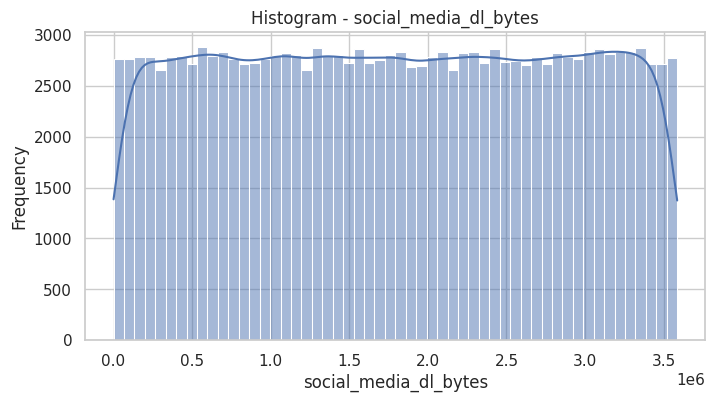

In [8]:
draw_histogram(df, 'social_media_dl_bytes')

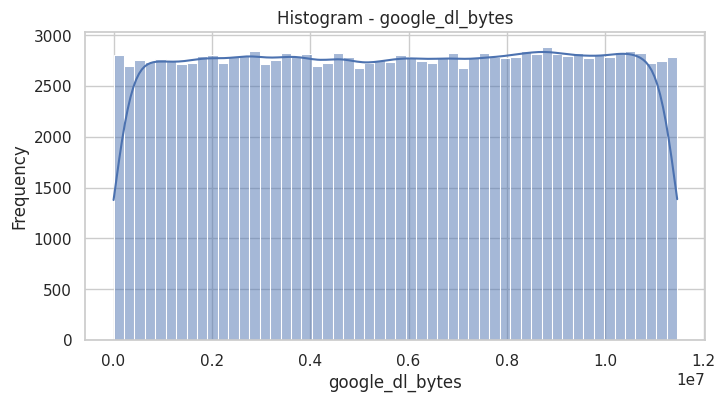

In [44]:
draw_histogram(df, 'google_dl_bytes')

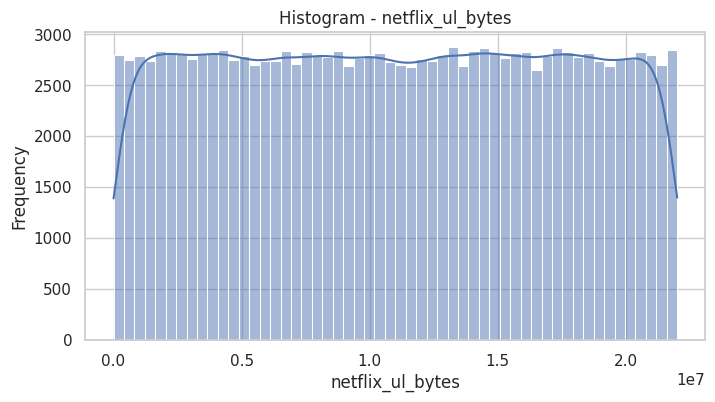

In [45]:
draw_histogram(df, 'netflix_ul_bytes')

### Bivariate Analysis

In [46]:
def plotly_scatter(df, x_col, y_col, marker_size, hover=[]):
    fig = px.scatter(
            df,
            x=x_col,
            y=y_col,
            opacity=0.8,
            hover_data=hover,
            title=f'{x_col} vs. {y_col}')
    fig.update_traces(marker_size=marker_size)
    fig.show()

In [47]:
plotly_scatter(df.sample(10000), 'youtube_dl_bytes', 'total_dl_bytes', marker_size=5)

In [48]:
plotly_scatter(df.sample(10000), 'social_media_dl_bytes', 'total_dl_bytes', marker_size=5)

In [49]:
plotly_scatter(df.sample(10000), 'netflix_dl_bytes', 'total_dl_bytes', marker_size=5)

### Variable transformations
- segment the users into top five decile classes based on the total duration for all sessions 
- compute the total data (DL+UL) per decile class. 

In [50]:
user_dur = df.groupby('msisdn_number').agg({'dur_ms': 'sum', 'total_ul_bytes': 'sum', 'total_dl_bytes': 'sum'})
user_dur['total_data'] = user_dur['total_ul_bytes'] + user_dur['total_dl_bytes']
user_dur

,dur_ms,total_ul_bytes,total_dl_bytes,total_data
msisdn_number,,,,
3.360167e+10,3.411213e+07,1.467565e+10,1.682756e+11,1.829512e+11
3.360171e+10,3.850300e+04,4.621197e+07,2.934050e+08,3.396170e+08
3.360171e+10,5.247800e+04,3.850972e+07,8.621012e+08,9.006109e+08
3.360171e+10,1.202980e+05,8.929984e+07,1.498037e+09,1.587337e+09
3.360171e+10,1.760220e+05,4.494626e+07,1.333844e+08,1.783307e+08
...,...,...,...,...
3.370000e+10,1.716720e+05,4.898112e+07,7.784317e+08,8.274129e+08
3.370000e+10,9.498000e+03,3.784142e+07,5.465595e+08,5.844009e+08
3.370000e+10,6.604500e+04,3.262826e+07,4.484382e+08,4.810664e+08


In [51]:
user_dur['dur_decile'] = pd.qcut(user_dur['dur_ms'], 5, labels=np.arange(1, 6))
total_data_per_decile = user_dur.groupby('dur_decile').agg(
    {'dur_ms': 'sum', 'total_data': 'sum'})
total_data_per_decile

,dur_ms,total_data
dur_decile,,
1,5.385743e+08,9.710840e+12
2,1.538429e+09,1.075465e+13
3,1.756453e+09,9.613778e+12
4,2.892296e+09,1.171941e+13
5,8.210247e+09,3.256701e+13


In [52]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("duration", "total_data"))
fig.add_trace(go.Scatter(x=np.array(range(1, 6)), y=total_data_per_decile['dur_ms']), row=1, col=1)
fig.add_trace(go.Scatter(x=np.array(range(1, 6)), y=total_data_per_decile['total_data']), row=1, col=2)
fig.update_layout(title_text="The Elbow Method", height=700)

# Use show instead of Image(pio.to_image(...))
fig.show()

### Correlation Analysis
- compute a correlation matrix for the following variables and interpret your findings: 
- Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data 

In [59]:
df = pd.read_csv("../../data/tellco_data.csv")

df["social_media"] = df["social_media_dl_bytes"] + df['social_media_ul_bytes']
df["google"] = df["google_dl_bytes"] + df["google_ul_bytes"]
df['email'] = df["email_dl_bytes"] + df["email_ul_bytes"]
df['youtube'] = df["youtube_dl_bytes"] + df["youtube_ul_bytes"]
df['netflix'] = df["netflix_dl_bytes"] + df["netflix_ul_bytes"]
df["gaming"] = df["gaming_dl_bytes"] + df["gaming_ul_bytes"]
df['other'] = df["other_dl_bytes"]+df["other_ul_bytes"]
df['total_data'] = df['total_dl_bytes'] + df['total_ul_bytes']

In [60]:

data_usage_df = df[['social_media',
                   'google',
                    'email',
                    'youtube',
                    'netflix',
                    'gaming',
                    'other', ]].copy()
data_usage_corr = data_usage_df.corr(method='pearson')
data_usage_corr


,social_media,google,email,youtube,netflix,gaming,other
social_media,1.000000,-0.001708,0.004032,0.000548,0.001013,0.001082,0.006065
google,-0.001708,1.000000,-0.000412,0.002277,-0.001902,-0.000994,-0.001727
email,0.004032,-0.000412,1.000000,-0.002919,0.001029,-0.000644,-0.001299
youtube,0.000548,0.002277,-0.002919,1.000000,0.002882,-0.002999,0.002969
netflix,0.001013,-0.001902,0.001029,0.002882,1.000000,-0.003109,-0.009033
gaming,0.001082,-0.000994,-0.000644,-0.002999,-0.003109,1.000000,-0.002661
other,0.006065,-0.001727,-0.001299,0.002969,-0.009033,-0.002661,1.000000


In [61]:

corr_matrix = data_usage_corr.values

# Create a Plotly figure using imshow
fig = px.imshow(corr_matrix)

# Show the figure
fig.show()

### Dimensionality Reduction
- perform a principal component analysis to reduce the dimensions of your data and
- provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum). 

In [82]:
numeric_columns = [  
                    'bearer_id',"start_ms","end_ms",'dur_ms', 'imsi', 'msisdn_number', 'imei', 
                    'avg_rtt_dl_ms', 'avg_rtt_ul_ms','avg_bearer_tp_dl_kbps', 'avg_bearer_tp_ul_kbps',
                    'dl_tp_<_50_kbps_pct', 
                    '50_kbps_<_dl_tp_<_250_kbps_pct','250_kbps_<_dl_tp_<_1_mbps_pct', 'dl_tp_>_1_mbps_pct',
                    'ul_tp_<_10_kbps_pct', '10_kbps_<_ul_tp_<_50_kbps_pct', '50_kbps_<_ul_tp_<_300_kbps_pct',
                    'ul_tp_>_300_kbps_pct', 'activity_duration_dl_ms', 
                    'activity_duration_ul_ms', 'dur_ms_1',
                    'nb_of_sec_with_vol_dl_<_6250b',
                    'nb_of_sec_with_vol_ul_<_1250b', 'total_ul_bytes', 'total_dl_bytes', "social_media_dl_bytes",
                    "social_media_ul_bytes", "google_dl_bytes", "google_ul_bytes", "email_dl_bytes", 
                    "email_ul_bytes", "youtube_dl_bytes", "youtube_ul_bytes", "netflix_dl_bytes", 
                    "netflix_ul_bytes", "gaming_dl_bytes", "gaming_ul_bytes", "other_dl_bytes",  "other_ul_bytes",   
                    'social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other', 'total_data']


In [83]:
feature_matrix = df[numeric_columns].values
feature_matrix.shape

(150002, 48)

In [84]:
scaler = StandardScaler()
scaler.fit(feature_matrix)

feature_matrix_scaled = scaler.transform(feature_matrix)

In [88]:
pca_48 = PCA(n_components=48, random_state=1)
pca_48.fit(feature_matrix_scaled)
x_pca_48 = pca_48.transform(feature_matrix_scaled)

In [89]:
pd.set_option('display.float_format', '{:.2f}'.format)
print(f"percentage of variance kept: {sum(pca_48.explained_variance_ratio_ * 100):.4}%")

percentage of variance kept: 100.0%


In [90]:
feat_mt_ratio = pca_48.explained_variance_ratio_ * 100
for i in range(len(numeric_columns)):
  print(f'{feat_mt_ratio[i]:.2f}')

21.59
8.89
5.66
4.49
4.47
4.45
4.42
4.39
4.27
3.24
2.92
2.49
2.25
2.24
2.23
2.23
2.22
2.22
2.20
2.15
2.10
1.95
1.86
1.30
1.05
0.90
0.64
0.34
0.30
0.20
0.16
0.08
0.07
0.04
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00


In [93]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=np.array(range(0, 45)),
              y=np.cumsum(pca_48.explained_variance_ratio_)), row=1, col=1)
fig.update_layout(title_text="The Elbow Method")

In [94]:
pca_24 = PCA(n_components=24, random_state=1)
pca_24.fit(feature_matrix_scaled)
x_pca_24 = pca_24.transform(feature_matrix_scaled)

In [96]:
print(
    f"percentage of variance kept: {sum(pca_24.explained_variance_ratio_ * 100):.4}%")

percentage of variance kept: 96.22%
